# Final Project
## Recognizable Differences between cell populations in Layer 4 of VISp

## Team Member Names & Contributions
*Feel free to name your team, but please also include your real names and IDs here. Please specify who in your group worked on which parts of the project.*

- **Isabella Ivy** *A13736664*
- **Michael Colwin** *A15351658*
- **Santhosh Shunmugaraja** *A15111308*

## Abstract

By using the Allen Cell Types Atlas and the Allen Brain Observatory, we were able to analyze any key differences between excitatory and inhibitory neurons in layer 4 of the primary visual cortex.  Scnn1a-Tg3-Cre cre line drivers were used to isolate data of excitatory neurons in layer 4 the Visual Cortex and the Pvalb-IRES-Cre cre line drivers were used to find data from inhibitory neurons in the same location. These excitatory and inhibitory neurons participate in directional selectivity in layer 4 of the primary visual cortex. The Allen Brain institute datasets allowed us to find key differences in function and response to stimuli.  

## Research Question

Are there any significant biological differences that allow us to indentify and differentiate the different cell populations of layer 4 of the primary visual cortex?

# Background and Prior Work

When processing visual information, the brain must not only take into account the color, shape, and position of an object, but also the orientation, movement and field depth of the object so that we can make sense of the objects that surround us. The visual cortex  is divided into six distinct layers.  The cells in layer four of the primary visual cortex (V1) are sensitive to, “countour length, direction of motion, size, depth, and most famously, orientation” (Priebe, N. J., & Ferster, D.,  2012). Studies show that both excitatory and inhibitory neurons are needed to process this information. These neurons create what are called receptor fields.  Which are groups of cells that are selective of (or tuned to) specific spatial orientation stimuli.  
Hubel and Wiesel (1962) first discovered two different types of groups of cells in V1.  They coined them simple and complex cells.  Simple cells are the groups that respond most definitively to orientation stimuli and complex are, well more complex.  These cells have distinct regions that are made of excitatory and inhibitory neurons that work together to respond to specific stimuli.  Without both types of these neurons working properly, visual information cannot be processed correctly. When the inhibitory neurons are blocked from signaling to the cortex, there is significant loss of orientation tuning (Kim and Freeman, 2020).  Our goal is to see if we can recognize distinct biological differences between these cells that we can use as markers for identifying them.  
To do this we are using the Scnn1a-Tg3-Cre cre driver line to identify excitatory data from the mouse V1.  Most neurons in layer 4 are excitatory neurons and most of those are excitatory pyramidal neurons that can be identified by Scnn1a-Tg3-Cre.  (Scala, F., et. al, 2019)  There are several types of inhibitory interneurons associated with these excitatory neurons in layer 4 of V1.  We chose Pvalb-IRES-Cre to identify the parvalbumin interneurons.   They represent 39% of the interneuron population in layer 4. (Scala, F., et. al, 2019)
The first dataset that we will analyze from the Allen Institute will be from the data from the Brain Observatory.  The Brain Observatory contains data from functional experiments with visual stimuli.  Some of those experiments record responses to different orientation stimuli and are directly applicable.  We plan on using principal component analysis (PCA) to analyze the data recorded from our two different types of cre line mice. 
The second dataset that we will analyze from the Allen Institute will be the Cell Types dataset with its electrophysiology dataset.  The goals of studying this dataset would be to find any differences in the electrophysiology of the two types of neurons, and to discern if those differences allow us to recognize neuronal subsets that are present in layer four of the visual cortex.  We will study all aspects of the spike responses from our two cre line and report any data that is statistically significant.  We will also do PCA on this dataset as well.  


### References (include links):
(1)Arkhipov A, Gouwens NW, Billeh YN, Gratiy S, Iyer R, Wei Z, et al. (2018) Visual physiology of the layer 4 cortical circuit in silico. PLoS Comput Biol 14(11): e1006535

(2) Hubel D.H., Wiesel T.N. (1962) Receptive fields, binocular interaction and functional architecture in the cat's visual cortex.
J. Physiol.; 160: 106-154

(3) Kim, T., & Freeman, R. D. (2016). Direction selectivity of neurons in the visual cortex is non-linear and lamina-dependent. The European journal of neuroscience, 43(10), 1389–1399. https://doi.org/10.1111/ejn.13223

(4) Priebe, N. J., & Ferster, D. (2012). Mechanisms of neuronal computation in mammalian visual cortex. Neuron, 75(2), 194–208. https://doi.org/10.1016/j.neuron.2012.06.011

(4) Scala, F., Kobak, D., Shan, S., Bernaerts, Y., Laturnus, S., Cadwell, C. R., Hartmanis, L., Froudarakis, E., Castro, J. R., Tan, Z. H., Papadopoulos, S., Patel, S. S., Sandberg, R., Berens, P., Jiang, X., & Tolias, A. S. (2019). Layer 4 of mouse neocortex differs in cell types and circuit organization between sensory areas. Nature communications, 10(1), 4174. https://doi.org/10.1038/s41467-019-12058-z


## Hypothesis


Excitatory neurons greatly outnumber inhibitory neurons in layer 4 of the primary visual cortex.  Their relationship is not linear.  In order to cooperate and make receptive fields work they must have different physiology and that physiology is probably recognizable in the Allen Institute data.

## Setup
At first we have to get the data from the CellTypes database.  This cell downloads the necessary packages to use the data from Allen Institute Cell Type dataset.     

In [2]:
#Import the necessary toolboxes from the allensdk
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi

#Import necessary packages 
#Plotting packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

#For manipulating data
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Data Wrangling

# **Cell Types Dataset**

Now we have to get the data from the CellTypes database.  This cell downloads the necessary data from experiments with the mouse visual cortex in the brain.   A standardized set of elecrophysiological stimuli were applied to mice brains. The stimulation waveforms in these experiments were designed to interrogate intrinsic membrane properties that contribute to the input/output function of neurons.  They also allow us to understand the neural response properties in vivo and allow for computational models that emulate the neural response to stereotyped stimuli. There were 2 groups of stimuli: a fixed ‘Core 1’ sequence and more flexible ‘Core 2’.  See the Allen Institue web site for more documentation.   

In [3]:
#Initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

#We will be using cre-lines to choose excitatory and inhibitory cells from the Cell Types Database 
#so we will only import the mouse cells data api because they haven't created cre-line humans  ........ yet
#With this mouse data we will create a dataframe with the 'id' as its index so we can manipulate it
mouse_df = pd.DataFrame(ctc.get_cells(species=[CellTypesApi.MOUSE]))

#Get the physiology data and make a dataframe with 'specimen_id' the index so the two dataframes can be joined
ephys_features = pd.DataFrame(ctc.get_ephys_features())

#ephys_features.head()

This is code that takes columns from the dataframe so that we can find which specimens match all our parameters.  

In [4]:
#This renames the 'id' column to 'specimen_id' so I don't get a headache when I try to merge them.
mouse_df = mouse_df.rename(columns={"id": "specimen_id"})

#This picks out the columns for the creline and brain location information we need from the mouse dataframe to use
mouse_crelines_df = mouse_df[['transgenic_line', 'specimen_id', 'structure_layer_name', 'structure_area_abbrev']]

mouse_crelines_df.head()

,transgenic_line,specimen_id,structure_layer_name,structure_area_abbrev
0,Oxtr-T2A-Cre,565871768,5,VISp
1,Pvalb-IRES-Cre,469801138,4,VISp
2,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,605889373,2/3,VISp
3,Cux2-CreERT2,485909730,5,VISp
4,Scnn1a-Tg3-Cre,323865917,5,VISp


This is just a little step where we merge the data from the CellTypes database with the data with the Electrophysiology data.  We matched them based on the specimen's id.  We did this so we have all the data in one place.  

In [5]:
#Here we merge them
mouse_crelines_ephys_data = mouse_crelines_df.merge(ephys_features,on='specimen_id', how='inner')
mouse_crelines_ephys_data.head()

,transgenic_line,specimen_id,structure_layer_name,structure_area_abbrev,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,has_burst,has_delay,has_pause,id,input_resistance_mohm,latency,peak_t_long_square,peak_t_ramp,peak_t_short_square,peak_v_long_square,peak_v_ramp,peak_v_short_square,rheobase_sweep_id,rheobase_sweep_number,ri,sag,seal_gohm,slow_trough_t_long_square,slow_trough_t_ramp,slow_trough_t_short_square,slow_trough_v_long_square,slow_trough_v_ramp,slow_trough_v_short_square,tau,threshold_i_long_square,threshold_i_ramp,threshold_i_short_square,threshold_t_long_square,threshold_t_ramp,threshold_t_short_square,threshold_v_long_square,threshold_v_ramp,threshold_v_short_square,thumbnail_sweep_id,trough_t_long_square,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
0,Oxtr-T2A-Cre,565871768,5,VISp,NaN,NaN,-2.825000,0.020384,1.072500,14.737980,1.023840,-59.187500,-57.437500,-62.600004,False,False,False,565878140,143.634288,0.027140,1.071700,14.737200,1.023084,35.375004,31.343750,34.662501,565873227,40,119.977675,0.054033,1.317484,NaN,NaN,NaN,NaN,NaN,NaN,11.291090,270.0,343.125000,800.0,1.071380,14.736820,1.022784,-36.281250,-33.812500,-43.500002,565873236,1.072540,14.738000,1.391268,-59.281254,-57.468754,-75.756252,1.564027,1.304349,1.679550,-87.906258,-74.926987
1,Pvalb-IRES-Cre,469801138,4,VISp,0.000643,12.507500,27.185625,1.156789,1.272425,11.763725,1.023350,-55.687504,-52.390625,-57.546877,False,False,False,469802615,129.903104,0.011870,1.271710,11.763022,1.022812,14.843751,19.000002,27.546876,469802064,57,65.624997,0.096598,1.044561,NaN,NaN,1.290815,NaN,NaN,-69.109379,4.121689,290.0,268.562500,270.0,1.271390,11.762707,1.022573,-31.781252,-29.187501,-44.046875,469802050,1.272540,11.763808,1.290815,-55.875000,-52.515627,-69.109379,1.162618,1.197155,1.369171,-80.156250,-72.042976
2,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,605889373,2/3,VISp,-0.015098,78.950909,17.437501,0.191853,1.879840,8.427893,1.027437,-47.093754,-51.447919,-55.989586,False,False,False,605903794,173.215264,0.074720,1.874900,8.423400,1.023523,16.781250,23.052084,27.770835,605897449,53,102.968708,0.030460,2.283349,NaN,8.432940,NaN,NaN,-54.364586,NaN,5.166574,280.0,185.083333,720.0,1.874260,8.422880,1.023127,-28.781252,-32.312503,-38.197918,605897441,1.882740,8.432940,1.315510,-48.187500,-54.364586,-72.640628,3.379321,4.108774,2.680139,-83.593758,-72.712036
3,Cux2-CreERT2,485909730,5,VISp,0.032340,55.895000,-55.964379,0.250000,1.112495,2.853377,1.025162,-49.000004,-51.989586,-56.588545,False,False,False,485911653,204.189664,0.038685,1.109795,2.851312,1.023422,17.250002,42.895835,35.109377,485910203,33,213.124961,0.029558,2.166797,1.139070,2.888133,1.520193,-54.031254,-57.385419,-77.750004,20.567767,70.0,45.749999,180.0,1.109235,2.850892,1.023048,-40.625004,-38.968753,-47.619794,485910207,1.139070,2.888133,1.520193,-54.031254,-57.385419,-77.750005,3.042933,3.517684,3.274181,-101.000000,-76.928391
4,Scnn1a-Tg3-Cre,323865917,5,VISp,0.026732,94.233500,96.421870,0.164286,1.197855,3.423100,1.024489,-47.750000,-48.312501,-53.208335,False,False,False,396487207,178.177008,0.056125,1.196355,3.421542,1.023108,43.937500,47.333333,41.588543,396366865,34,166.250005,0.166221,2.238013,1.237065,3.467847,1.317042,-57.281254,-56.895833,-70.218751,23.182755,70.0,60.041668,750.0,1.195930,3.421125,1.022758,-36.843750,-37.531250,-43.109376,396366869,1.237065,3.467847,1.317042,-57.281254,-56.895833,-70.218751,2.974194,3.156117,2.946463,-88.406250,-69.402855


We now want to isolate our specific cre line, to the layer and brain location that we want.  By doing this we are isolating the electrophysiological data for Pvalb-IRES-Cre creline inhibitory neurons in layer 4 of the primary visual cortex and Scnn1a-Tg3-Cre also in layer 4 of the primary visual cortex.

In [6]:
#Each line of code here isolates the rows matching the inhibitory neuron data that we want from the appropiate column
mouse_inhib_df1 = mouse_crelines_ephys_data[(mouse_crelines_ephys_data['transgenic_line'] == 'Pvalb-IRES-Cre')]
mouse_inhib_df2 = mouse_inhib_df1[(mouse_inhib_df1['structure_area_abbrev'] == 'VISp')]
mouse_inhib_ephys = mouse_inhib_df2[(mouse_inhib_df2['structure_layer_name'] == '4')]

mouse_inhib_ephys.head()

,transgenic_line,specimen_id,structure_layer_name,structure_area_abbrev,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,has_burst,has_delay,has_pause,id,input_resistance_mohm,latency,peak_t_long_square,peak_t_ramp,peak_t_short_square,peak_v_long_square,peak_v_ramp,peak_v_short_square,rheobase_sweep_id,rheobase_sweep_number,ri,sag,seal_gohm,slow_trough_t_long_square,slow_trough_t_ramp,slow_trough_t_short_square,slow_trough_v_long_square,slow_trough_v_ramp,slow_trough_v_short_square,tau,threshold_i_long_square,threshold_i_ramp,threshold_i_short_square,threshold_t_long_square,threshold_t_ramp,threshold_t_short_square,threshold_v_long_square,threshold_v_ramp,threshold_v_short_square,thumbnail_sweep_id,trough_t_long_square,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
1,Pvalb-IRES-Cre,469801138,4,VISp,0.000643,12.507500,27.185625,1.156789,1.272425,11.763725,1.023350,-55.687504,-52.390625,-57.546877,False,False,False,469802615,129.903104,0.011870,1.271710,11.763022,1.022812,14.843751,19.000002,27.546876,469802064,57,65.624997,0.096598,1.044561,NaN,NaN,1.290815,NaN,NaN,-69.109379,4.121689,290.000000,268.562500,270.000000,1.271390,11.762707,1.022573,-31.781252,-29.187501,-44.046875,469802050,1.272540,11.763808,1.290815,-55.875000,-52.515627,-69.109379,1.162618,1.197155,1.369171,-80.156250,-72.042976
117,Pvalb-IRES-Cre,487405644,4,VISp,0.000996,19.362255,-33.476246,0.772348,1.094250,8.718850,1.023793,-58.031254,-56.739587,-61.575003,False,False,False,487427756,136.727376,0.010570,1.093490,8.718072,1.022976,19.000002,19.770835,19.768751,487415213,33,145.625040,0.011844,2.251376,NaN,NaN,1.454521,NaN,NaN,-70.156253,6.399644,190.000000,192.458333,430.000031,1.093190,8.717757,1.022709,-34.156250,-33.135419,-40.768752,487415219,1.094335,8.718913,1.454521,-58.156250,-56.854168,-70.156253,1.272070,1.266610,1.404371,-85.468758,-69.590126
152,Pvalb-IRES-Cre,478793814,4,VISp,0.003198,17.355714,11.163750,0.716402,1.056425,11.896130,1.024289,-59.406254,-59.125004,-61.731253,False,False,False,478795095,86.981600,0.013485,1.055430,11.895163,1.023375,11.625000,16.604168,24.162501,478794280,52,67.187689,0.067720,1.296412,1.202045,NaN,1.531172,-44.406254,NaN,-78.781253,7.294104,310.000000,271.875000,780.000000,1.055080,11.894797,1.023066,-35.406250,-40.968751,-49.175002,478794284,1.056520,11.896288,1.531172,-59.531254,-59.354168,-78.781253,1.393663,1.402116,1.609452,-95.343750,-78.447914
210,Pvalb-IRES-Cre,484744867,4,VISp,0.006846,4.658478,72.551243,2.111776,1.024225,NaN,1.023182,-73.968750,NaN,-71.100005,False,False,False,484746168,135.545392,0.002570,1.023885,NaN,1.022839,22.468752,NaN,24.437500,484745305,37,134.151921,0.068429,1.203822,NaN,NaN,1.578872,NaN,NaN,-70.781250,6.332176,209.999985,NaN,300.000000,1.023675,NaN,1.022653,-50.562500,NaN,-49.487502,484745309,1.024240,NaN,1.285388,-74.000000,NaN,-71.387502,0.935694,NaN,0.997145,-100.875008,-70.245308
214,Pvalb-IRES-Cre,475894121,4,VISp,NaN,14.980000,5.502500,0.780911,1.050670,NaN,1.024004,-56.125004,NaN,-58.989586,False,False,False,475894862,166.509424,0.013810,1.049740,NaN,1.023139,12.812501,NaN,23.713543,475894618,55,149.687573,0.061902,1.103581,NaN,NaN,NaN,NaN,NaN,NaN,6.198586,200.000000,NaN,610.000000,1.049400,NaN,1.022873,-30.656252,NaN,-41.354170,475894604,1.050715,NaN,1.729035,-56.281254,NaN,-77.864586,1.265073,NaN,1.635448,-99.187508,-78.509483


In [7]:
mouse_inhib_ephys.shape

(62, 59)

In [8]:
#Each line of code here isolates the rows matching the inhibitory neuron data that we want from the appropiate column
mouse_excit_df1 = mouse_crelines_ephys_data[(mouse_crelines_ephys_data['transgenic_line'] == 'Scnn1a-Tg3-Cre')]
mouse_excit_df2 = mouse_excit_df1[(mouse_excit_df1['structure_area_abbrev'] == 'VISp')]
mouse_excit_ephys = mouse_excit_df2[(mouse_excit_df2['structure_layer_name'] == '4')]

mouse_excit_ephys.head()

,transgenic_line,specimen_id,structure_layer_name,structure_area_abbrev,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,has_burst,has_delay,has_pause,id,input_resistance_mohm,latency,peak_t_long_square,peak_t_ramp,peak_t_short_square,peak_v_long_square,peak_v_ramp,peak_v_short_square,rheobase_sweep_id,rheobase_sweep_number,ri,sag,seal_gohm,slow_trough_t_long_square,slow_trough_t_ramp,slow_trough_t_short_square,slow_trough_v_long_square,slow_trough_v_ramp,slow_trough_v_short_square,tau,threshold_i_long_square,threshold_i_ramp,threshold_i_short_square,threshold_t_long_square,threshold_t_ramp,threshold_t_short_square,threshold_v_long_square,threshold_v_ramp,threshold_v_short_square,thumbnail_sweep_id,trough_t_long_square,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
8,Scnn1a-Tg3-Cre,476135066,4,VISp,0.098665,113.287143,-68.804996,0.139337,1.151005,5.805325,1.025066,-44.468754,-45.197919,-46.587502,False,False,False,476172339,105.986640,0.059385,1.148220,5.803153,1.023310,35.781254,38.697918,43.700003,476144277,37,95.178552,0.031621,1.063488,1.185285,5.837250,1.416055,-54.281254,-55.656254,-75.062500,25.216166,130.0,119.583323,424.0,1.147855,5.802792,1.023007,-36.656254,-35.895835,-48.556252,476144281,1.185285,5.837250,1.416055,-54.281254,-55.656254,-75.062500,3.386317,3.171764,3.857029,-87.000008,-75.066132
22,Scnn1a-Tg3-Cre,470098860,4,VISp,0.028417,61.052667,-3.065625,0.227151,1.139550,4.441972,1.025102,-54.093754,-52.614587,-53.937503,False,False,False,470160928,142.898272,0.037945,1.137480,4.440172,1.023376,35.187500,35.531250,37.112502,470154772,46,179.687470,0.032512,2.195178,1.156085,4.464322,1.495018,-60.656254,-58.979170,-80.862502,26.756292,100.0,85.541667,900.0,1.137090,4.439783,1.023034,-42.281250,-39.239586,-50.250002,470154756,1.156085,4.464322,1.495018,-60.656254,-58.979170,-80.862502,3.278334,3.049282,3.712753,-99.187508,-80.129494
25,Scnn1a-Tg3-Cre,479091820,4,VISp,0.258177,104.791667,-10.133750,-0.003381,1.189130,5.958838,1.026841,-46.000000,-45.614586,-52.023440,False,False,False,479094041,153.632064,0.061840,1.182530,5.953922,1.023524,24.000000,24.291668,32.406251,479092968,38,154.107109,0.075938,2.517844,1.236585,5.989438,1.352083,-56.156250,-52.583335,-78.898438,19.143602,110.0,123.333331,460.0,1.181850,5.953228,1.023052,-31.937502,-30.604168,-49.117189,479092974,1.236585,5.989438,1.352083,-56.156250,-52.583335,-78.898438,3.139299,2.898330,3.893947,-94.625000,-78.553154
65,Scnn1a-Tg3-Cre,515202564,4,VISp,0.015462,71.547692,-12.660000,0.141274,1.239480,5.741353,1.025428,-48.531254,-46.177083,-51.875002,False,False,False,515202865,169.609664,0.059960,1.236380,5.738853,1.023460,32.000000,38.979167,36.862502,515202698,49,123.906247,0.069373,1.842839,1.274960,5.782207,1.605676,-59.250004,-55.645833,-78.375005,20.855973,100.0,117.708328,1080.0,1.235940,5.738427,1.023104,-38.218750,-35.635417,-45.306252,515202680,1.274960,5.782207,1.605676,-59.250004,-55.645833,-78.375005,3.824073,3.997622,3.830650,-92.062500,-77.858864
211,Scnn1a-Tg3-Cre,476269122,4,VISp,NaN,NaN,-14.635000,0.114082,1.181900,4.681013,1.025358,-47.000004,-47.697919,-51.012502,False,False,False,476270343,131.712256,0.079980,1.179195,4.678583,1.023402,39.531254,39.791668,46.750002,476269995,77,124.687426,0.017851,2.270196,1.212600,4.717250,NaN,-54.718750,-57.208337,NaN,17.407119,150.0,91.458333,1160.0,1.178765,4.678150,1.023045,-34.031254,-31.416668,-46.587502,476269941,1.212600,4.717250,1.424983,-54.718750,-57.208337,-76.156255,3.214515,2.789790,3.783612,-88.687500,-76.060822


In [9]:
mouse_excit_ephys.shape

(46, 59)

##### Checking NaN counts for each column in the mouse_inhib_ephys dataframe

Not every data set is perfect.  Some columns have NaN instead of actual numbers.  Here we clean up the data so that we don't have to deal with that.  

In [10]:
mouse_inhib_ephys[mouse_inhib_ephys.isna().any(axis=1)].shape

(62, 59)

In [11]:
inhib_columns = ['adaptation', 'avg_isi', 'electrode_0_pa', 'f_i_curve_slope', 'fast_trough_t_long_square', 
                 'fast_trough_t_ramp', 'fast_trough_t_short_square', 'fast_trough_v_long_square', 'fast_trough_v_ramp', 
                 'fast_trough_v_short_square', 'has_burst', 'has_delay', 'has_pause', 'id', 'input_resistance_mohm', 
                 'latency', 'peak_t_long_square', 'peak_t_ramp', 'peak_t_short_square', 'peak_v_long_square', 
                 'peak_v_ramp', 'peak_v_short_square', 'rheobase_sweep_id', 'rheobase_sweep_number', 'ri', 'sag', 
                 'seal_gohm', 'slow_trough_t_long_square', 'slow_trough_t_ramp', 'slow_trough_t_short_square', 
                 'slow_trough_v_long_square', 'slow_trough_v_ramp', 'slow_trough_v_short_square', 'tau', 
                 'threshold_i_long_square', 'threshold_i_ramp', 'threshold_i_short_square', 'threshold_t_long_square', 
                 'threshold_t_ramp', 'threshold_t_short_square', 'threshold_v_long_square', 'threshold_v_ramp', 
                 'threshold_v_short_square', 'thumbnail_sweep_id', 'trough_t_long_square', 'trough_t_ramp', 
                 'trough_t_short_square', 'trough_v_long_square', 'trough_v_ramp', 'trough_v_short_square', 
                 'upstroke_downstroke_ratio_long_square', 'upstroke_downstroke_ratio_ramp', 
                 'upstroke_downstroke_ratio_short_square', 'vm_for_sag', 'vrest']

In [12]:
#This is code we used to test it
#for column in inhib_columns:
#    print("mouse_inhib_ephys" + ' ' + str(column))
#    print(mouse_inhib_ephys[mouse_inhib_ephys[column].isna()].shape)

##### Checking NaN counts for each column in the mouse_excit_ephys dataframe

In [13]:
mouse_excit_ephys[mouse_excit_ephys.isna().any(axis=1)].shape

(10, 59)

In [14]:
excit_columns = ['adaptation', 'avg_isi', 'electrode_0_pa', 'f_i_curve_slope', 'fast_trough_t_long_square', 
                 'fast_trough_t_ramp', 'fast_trough_t_short_square', 'fast_trough_v_long_square', 'fast_trough_v_ramp', 
                 'fast_trough_v_short_square', 'has_burst', 'has_delay', 'has_pause', 'id', 'input_resistance_mohm', 
                 'latency', 'peak_t_long_square', 'peak_t_ramp', 'peak_t_short_square', 'peak_v_long_square', 
                 'peak_v_ramp', 'peak_v_short_square', 'rheobase_sweep_id', 'rheobase_sweep_number', 'ri', 'sag', 
                 'seal_gohm', 'slow_trough_t_long_square', 'slow_trough_t_ramp', 'slow_trough_t_short_square', 
                 'slow_trough_v_long_square', 'slow_trough_v_ramp', 'slow_trough_v_short_square', 'tau', 
                 'threshold_i_long_square', 'threshold_i_ramp', 'threshold_i_short_square', 'threshold_t_long_square', 
                 'threshold_t_ramp', 'threshold_t_short_square', 'threshold_v_long_square', 'threshold_v_ramp', 
                 'threshold_v_short_square', 'thumbnail_sweep_id', 'trough_t_long_square', 'trough_t_ramp', 
                 'trough_t_short_square', 'trough_v_long_square', 'trough_v_ramp', 'trough_v_short_square', 
                 'upstroke_downstroke_ratio_long_square', 'upstroke_downstroke_ratio_ramp', 
                 'upstroke_downstroke_ratio_short_square', 'vm_for_sag', 'vrest']

In [15]:
#This is code we used to test it
#for column in excit_columns:
#    print("mouse_excit_ephys" + ' ' + str(column))
#    print(mouse_excit_ephys[mouse_excit_ephys[column].isna()].shape)

Here columns with 11+ NaN values are deleted to clean the data of measurements that are mostly useless for analyzation

In [16]:
del mouse_inhib_ephys['slow_trough_t_long_square'], mouse_inhib_ephys['slow_trough_t_ramp']
del mouse_inhib_ephys['slow_trough_t_short_square'], mouse_inhib_ephys['slow_trough_v_long_square']
del mouse_inhib_ephys['slow_trough_v_ramp'], mouse_inhib_ephys['slow_trough_v_short_square'] 
del mouse_inhib_ephys['fast_trough_t_ramp'], mouse_inhib_ephys['fast_trough_v_ramp'],mouse_inhib_ephys['peak_t_ramp']
del mouse_inhib_ephys['peak_v_ramp'], mouse_inhib_ephys['threshold_i_ramp'], mouse_inhib_ephys['threshold_t_ramp']
del mouse_inhib_ephys['threshold_v_ramp'], mouse_inhib_ephys['trough_t_ramp'], mouse_inhib_ephys['trough_v_ramp'] 
del mouse_inhib_ephys['upstroke_downstroke_ratio_ramp']

In [17]:
del mouse_excit_ephys['slow_trough_t_long_square'], mouse_excit_ephys['slow_trough_t_ramp'] 
del mouse_excit_ephys['slow_trough_t_short_square'], mouse_excit_ephys['slow_trough_v_long_square']  
del mouse_excit_ephys['slow_trough_v_ramp'], mouse_excit_ephys['slow_trough_v_short_square']
del mouse_excit_ephys['fast_trough_t_ramp'], mouse_excit_ephys['fast_trough_v_ramp'], mouse_excit_ephys['peak_t_ramp']
del mouse_excit_ephys['peak_v_ramp'], mouse_excit_ephys['threshold_i_ramp'], mouse_excit_ephys['threshold_t_ramp']
del mouse_excit_ephys['threshold_v_ramp'], mouse_excit_ephys['trough_t_ramp'], mouse_excit_ephys['trough_v_ramp']
del mouse_excit_ephys['upstroke_downstroke_ratio_ramp']

### Combine the excitatory and inhibitory dataframes

We create two dataframes from the original. One for our excitatory data and one for inhibitory data.  We combine the two into a dataframe called neurons.

In [18]:
frames = [mouse_excit_ephys, mouse_inhib_ephys]
neurons = pd.concat(frames)
neurons.head()

,transgenic_line,specimen_id,structure_layer_name,structure_area_abbrev,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_short_square,has_burst,has_delay,has_pause,id,input_resistance_mohm,latency,peak_t_long_square,peak_t_short_square,peak_v_long_square,peak_v_short_square,rheobase_sweep_id,rheobase_sweep_number,ri,sag,seal_gohm,tau,threshold_i_long_square,threshold_i_short_square,threshold_t_long_square,threshold_t_short_square,threshold_v_long_square,threshold_v_short_square,thumbnail_sweep_id,trough_t_long_square,trough_t_short_square,trough_v_long_square,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
8,Scnn1a-Tg3-Cre,476135066,4,VISp,0.098665,113.287143,-68.804996,0.139337,1.151005,1.025066,-44.468754,-46.587502,False,False,False,476172339,105.986640,0.059385,1.148220,1.023310,35.781254,43.700003,476144277,37,95.178552,0.031621,1.063488,25.216166,130.0,424.0,1.147855,1.023007,-36.656254,-48.556252,476144281,1.185285,1.416055,-54.281254,-75.062500,3.386317,3.857029,-87.000008,-75.066132
22,Scnn1a-Tg3-Cre,470098860,4,VISp,0.028417,61.052667,-3.065625,0.227151,1.139550,1.025102,-54.093754,-53.937503,False,False,False,470160928,142.898272,0.037945,1.137480,1.023376,35.187500,37.112502,470154772,46,179.687470,0.032512,2.195178,26.756292,100.0,900.0,1.137090,1.023034,-42.281250,-50.250002,470154756,1.156085,1.495018,-60.656254,-80.862502,3.278334,3.712753,-99.187508,-80.129494
25,Scnn1a-Tg3-Cre,479091820,4,VISp,0.258177,104.791667,-10.133750,-0.003381,1.189130,1.026841,-46.000000,-52.023440,False,False,False,479094041,153.632064,0.061840,1.182530,1.023524,24.000000,32.406251,479092968,38,154.107109,0.075938,2.517844,19.143602,110.0,460.0,1.181850,1.023052,-31.937502,-49.117189,479092974,1.236585,1.352083,-56.156250,-78.898438,3.139299,3.893947,-94.625000,-78.553154
65,Scnn1a-Tg3-Cre,515202564,4,VISp,0.015462,71.547692,-12.660000,0.141274,1.239480,1.025428,-48.531254,-51.875002,False,False,False,515202865,169.609664,0.059960,1.236380,1.023460,32.000000,36.862502,515202698,49,123.906247,0.069373,1.842839,20.855973,100.0,1080.0,1.235940,1.023104,-38.218750,-45.306252,515202680,1.274960,1.605676,-59.250004,-78.375005,3.824073,3.830650,-92.062500,-77.858864
211,Scnn1a-Tg3-Cre,476269122,4,VISp,NaN,NaN,-14.635000,0.114082,1.181900,1.025358,-47.000004,-51.012502,False,False,False,476270343,131.712256,0.079980,1.179195,1.023402,39.531254,46.750002,476269995,77,124.687426,0.017851,2.270196,17.407119,150.0,1160.0,1.178765,1.023045,-34.031254,-46.587502,476269941,1.212600,1.424983,-54.718750,-76.156255,3.214515,3.783612,-88.687500,-76.060822


This is just a little more cleaning of the data.  You will see we are constantly cleaning the data and creating a new dataframe, using the same data, so that it can have a more and more refined database.  Also we were working collaboratively so certain columns might have been more useful to some types of analyses than others. 

In [19]:
del neurons['has_burst'], neurons['has_delay'], neurons['has_pause'], 
del neurons['structure_area_abbrev']
del neurons['adaptation'], neurons['avg_isi']

In [20]:
neurons.dropna(inplace=True)

In [21]:
neurons_columns = neurons.columns
#for column in neurons_columns:
#    print("neurons" + ' ' + str(column))
#    print(neurons[neurons[column].isna()].shape)

After combining the two dataframes, we created a dataframe named x_data_cells that would be useful for PCA analysis.  We also made sure there were separate data sets for excitatory and inhibitory that were clean and could be used in other analyses.

In [22]:
#Just removing all the columns that are not useful to create a data set for PCA
x_data_temp1 = neurons.drop('structure_layer_name',axis=1)
x_data_temp2 = x_data_temp1.drop('specimen_id',axis=1)
x_data_temp4 = x_data_temp2.drop('id',axis=1)
x_data_temp5 = x_data_temp4.drop('electrode_0_pa',axis=1)
x_data_temp6 = x_data_temp5.drop('rheobase_sweep_id',axis=1)
x_data_cells = x_data_temp6.drop('rheobase_sweep_number',axis=1)


#This data will be used later for other analyses
x_data_excit = x_data_cells[x_data_cells['transgenic_line'] == 'Scnn1a-Tg3-Cre']
x_data_inhib = x_data_cells[x_data_cells['transgenic_line'] == 'Pvalb-IRES-Cre']

x_data_cells = x_data_cells.drop('transgenic_line', axis = 1)
x_data_excit = x_data_excit.drop('transgenic_line', axis = 1)
x_data_inhib = x_data_inhib.drop('transgenic_line', axis = 1)
x_data_excit.head()

,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_short_square,input_resistance_mohm,latency,peak_t_long_square,peak_t_short_square,peak_v_long_square,peak_v_short_square,ri,sag,seal_gohm,tau,threshold_i_long_square,threshold_i_short_square,threshold_t_long_square,threshold_t_short_square,threshold_v_long_square,threshold_v_short_square,thumbnail_sweep_id,trough_t_long_square,trough_t_short_square,trough_v_long_square,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
8,0.139337,1.151005,1.025066,-44.468754,-46.587502,105.986640,0.059385,1.148220,1.023310,35.781254,43.700003,95.178552,0.031621,1.063488,25.216166,130.0,424.0,1.147855,1.023007,-36.656254,-48.556252,476144281,1.185285,1.416055,-54.281254,-75.062500,3.386317,3.857029,-87.000008,-75.066132
22,0.227151,1.139550,1.025102,-54.093754,-53.937503,142.898272,0.037945,1.137480,1.023376,35.187500,37.112502,179.687470,0.032512,2.195178,26.756292,100.0,900.0,1.137090,1.023034,-42.281250,-50.250002,470154756,1.156085,1.495018,-60.656254,-80.862502,3.278334,3.712753,-99.187508,-80.129494
25,-0.003381,1.189130,1.026841,-46.000000,-52.023440,153.632064,0.061840,1.182530,1.023524,24.000000,32.406251,154.107109,0.075938,2.517844,19.143602,110.0,460.0,1.181850,1.023052,-31.937502,-49.117189,479092974,1.236585,1.352083,-56.156250,-78.898438,3.139299,3.893947,-94.625000,-78.553154
65,0.141274,1.239480,1.025428,-48.531254,-51.875002,169.609664,0.059960,1.236380,1.023460,32.000000,36.862502,123.906247,0.069373,1.842839,20.855973,100.0,1080.0,1.235940,1.023104,-38.218750,-45.306252,515202680,1.274960,1.605676,-59.250004,-78.375005,3.824073,3.830650,-92.062500,-77.858864
211,0.114082,1.181900,1.025358,-47.000004,-51.012502,131.712256,0.079980,1.179195,1.023402,39.531254,46.750002,124.687426,0.017851,2.270196,17.407119,150.0,1160.0,1.178765,1.023045,-34.031254,-46.587502,476269941,1.212600,1.424983,-54.718750,-76.156255,3.214515,3.783612,-88.687500,-76.060822


# Allen Brain Observatory data

This is code for retrieving other necessary toolboxes from the Allen Brain Observatory.  These toolboxes will allow us to use the data from the Visual Coding data set.   The Allen institutes Visual Data coding set characterizes single neurons and populations of neurons by their responses to a range of visual stimuli.

In [23]:
#These are the Allen toolboxes
import allensdk.brain_observatory.stimulus_info as stim_info
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

#Create and instance of the Brain Allen Observatory cache as an object
boc = BrainObservatoryCache(manifest_file='/datasets/allen-brain-observatory/visual-coding-2p/manifest.json')

visual_area = 'VISp'
cre_line1 = 'Scnn1a-Tg3-Cre'
cre_line2 = 'Pvalb-IRES-Cre'

The code in the cells below screen for experiments in the Allen Brain Observatory Database with our Cre line markers Scnn1a-Tg3-Cre and Pvalb-IRES-Cre in the Primary Visual region.  Scnn1a-Tg3-Cre is predominantly expressed in excitatory neurons in cortical layer 4.  The Pvalb-IRES-Cre cre driver is widely expressed in (PV)-positive GABAergic neurons in the brain.  

In [24]:
exps = boc.get_experiment_containers(targeted_structures=[visual_area],cre_lines=[cre_line1],)

#Create a dataframe so we can find out what how many and what kind of experiments there are for our cre lines
excit_exps_df = pd.DataFrame(exps)
if  excit_exps_df.empty:
    print('There are no experiments for that combo.')

print('These are all the experiments for ' + str(cre_line1) + " cells in " + visual_area + ': ')
excit_exps_df.head()

These are all the experiments for Scnn1a-Tg3-Cre cells in VISp: 


,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed
0,511510911,350,VISp,Scnn1a-Tg3-Cre,Ai93(TITL-GCaMP6f),230570,Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570,[],False
1,511510955,275,VISp,Scnn1a-Tg3-Cre,Ai93(TITL-GCaMP6f),231951,Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-231951,[],False
2,511507811,350,VISp,Scnn1a-Tg3-Cre,Ai93(TITL-GCaMP6f),221470,Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-221470,[],False
3,535575493,275,VISp,Scnn1a-Tg3-Cre,Ai93(TITL-GCaMP6f),250789,Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-250789,[],False
4,540993888,350,VISp,Scnn1a-Tg3-Cre,Ai93(TITL-GCaMP6f),250789,Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-250789,[],False


In [25]:
exps2 = boc.get_experiment_containers(targeted_structures=[visual_area],cre_lines=[cre_line2],)

#Create a dataframe so we can find out what how many and what kind of experiments there are for our cre lines
inhib_exps_df = pd.DataFrame(exps2)
if  inhib_exps_df.empty:
    print('There are no experiments for that combo.')

print('These are all the experiments for ' + str(cre_line2) + " cells in " + visual_area + ': ')
inhib_exps_df.head()


These are all the experiments for Pvalb-IRES-Cre cells in VISp: 


,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed
0,670396939,195,VISp,Pvalb-IRES-Cre,Ai162(TIT2L-GC6s-ICL-tTA2),369497,Pvalb-IRES-Cre;Ai162-369497,[],False
1,710327593,375,VISp,Pvalb-IRES-Cre,Ai162(TIT2L-GC6s-ICL-tTA2),388801,Pvalb-IRES-Cre;Ai162-388801,[],False
2,669859917,225,VISp,Pvalb-IRES-Cre,Ai162(TIT2L-GC6s-ICL-tTA2),369495,Pvalb-IRES-Cre;Ai162-369495,[],False
3,672223113,275,VISp,Pvalb-IRES-Cre,Ai162(TIT2L-GC6s-ICL-tTA2),369498,Pvalb-IRES-Cre;Ai162-369498,[],False
4,670721865,275,VISp,Pvalb-IRES-Cre,Ai162(TIT2L-GC6s-ICL-tTA2),369496,Pvalb-IRES-Cre;Ai162-369496,[],False


All of the inhibitory and excitatory information from the Allen Brain observatory is put into one dataframe: brain_df.

In [26]:
#This combines the two dataframes
frames = [excit_exps_df, inhib_exps_df]
brain_df = pd.concat(frames)

#This get the useful data
specimens = list(brain_df['id'])
useful_specimens = pd.DataFrame(boc.get_cell_specimens(experiment_container_ids=specimens))
useful_specimens.head()

,p_run_mod_sg,tlr1_id,image_sel_ns,tlr1_name,g_dsi_dg,p_ns,specimen_id,p_dg,time_to_peak_sg,pref_dir_dg,dsi_dg,rf_overlap_index_lsn,rf_distance_lsn,tld1_name,osi_dg,pref_image_ns,experiment_container_id,peak_dff_sg,osi_sg,rf_center_on_y_lsn,time_to_peak_ns,rf_chi2_lsn,failed_experiment_container,reliability_ns,tld1_id,reliability_sg,imaging_depth,run_mod_ns,rf_center_on_x_lsn,area,peak_dff_dg,p_sg,rf_area_on_lsn,tld2_name,pref_ori_sg,rf_area_off_lsn,p_run_mod_ns,pref_phase_sg,rf_center_off_y_lsn,pref_tf_dg,tfdi_dg,cell_specimen_id,reliability_dg,tld2_id,run_mod_dg,p_run_mod_dg,reliability_nm1_a,reliability_nm1_c,reliability_nm1_b,rf_center_off_x_lsn,peak_dff_ns,donor_full_genotype,all_stim,run_mod_sg,pref_sf_sg,sfdi_sg,g_osi_sg,g_osi_dg,reliability_nm3,reliability_nm2
0,NaN,265943423,NaN,Ai93(TITL-GCaMP6f),NaN,NaN,502185555,NaN,NaN,NaN,NaN,NaN,NaN,Scnn1a-Tg3-Cre,NaN,NaN,511498742,NaN,NaN,NaN,NaN,1.000000,False,NaN,177837516,NaN,350,NaN,NaN,VISp,NaN,NaN,NaN,Camk2a-tTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,517397327,NaN,177837320.0,NaN,NaN,NaN,0.062364,NaN,NaN,NaN,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,False,NaN,NaN,NaN,NaN,NaN,NaN,0.099343
1,NaN,265943423,NaN,Ai93(TITL-GCaMP6f),0.824858,NaN,502185555,2.690800e-15,NaN,0.0,1.461268,NaN,NaN,Scnn1a-Tg3-Cre,1.244707,NaN,511498742,NaN,NaN,NaN,NaN,NaN,False,NaN,177837516,NaN,350,NaN,NaN,VISp,4.711705,NaN,NaN,Camk2a-tTA,NaN,NaN,NaN,NaN,NaN,1.0,0.333074,517397340,0.040219,177837320.0,NaN,NaN,0.096857,NaN,NaN,NaN,NaN,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,False,NaN,NaN,NaN,NaN,0.901542,0.026367,NaN
2,NaN,265943423,NaN,Ai93(TITL-GCaMP6f),0.812462,NaN,502185555,3.070093e-02,NaN,180.0,NaN,NaN,NaN,Scnn1a-Tg3-Cre,NaN,NaN,511498742,NaN,NaN,NaN,NaN,0.213852,False,NaN,177837516,NaN,350,NaN,NaN,VISp,1.554054,NaN,NaN,Camk2a-tTA,NaN,64.045886,NaN,NaN,47.628354,2.0,0.258131,517397343,-0.017892,177837320.0,NaN,NaN,0.012042,0.063649,NaN,36.931727,NaN,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,False,NaN,NaN,NaN,NaN,0.894923,0.040158,0.030118
3,NaN,265943423,NaN,Ai93(TITL-GCaMP6f),0.078742,NaN,502185555,1.245296e-01,NaN,NaN,NaN,NaN,NaN,Scnn1a-Tg3-Cre,NaN,NaN,511498742,NaN,NaN,NaN,NaN,1.000000,False,NaN,177837516,NaN,350,NaN,NaN,VISp,1.538569,NaN,NaN,Camk2a-tTA,NaN,NaN,NaN,NaN,NaN,NaN,0.231590,517397347,0.003620,177837320.0,NaN,NaN,0.023418,0.115173,NaN,NaN,NaN,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,False,NaN,NaN,NaN,NaN,0.109241,0.022241,0.041259
4,NaN,265943423,NaN,Ai93(TITL-GCaMP6f),NaN,NaN,502185555,NaN,NaN,NaN,NaN,NaN,NaN,Scnn1a-Tg3-Cre,NaN,NaN,511498742,NaN,NaN,NaN,NaN,1.000000,False,NaN,177837516,NaN,350,NaN,NaN,VISp,NaN,NaN,NaN,Camk2a-tTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,517397353,NaN,177837320.0,NaN,NaN,NaN,0.029581,NaN,NaN,NaN,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026227


A dataframe called useful_specimens is created with all of the data thought necesssary for our analyses.  

In [27]:
useful_specimens.drop(['p_run_mod_sg', 'time_to_peak_sg', 'pref_dir_dg', 'dsi_dg', 'rf_overlap_index_lsn', 
                       'rf_distance_lsn','osi_dg','osi_sg', 'rf_center_on_y_lsn', 'time_to_peak_ns','run_mod_ns', 
                       'rf_center_on_x_lsn','rf_area_on_lsn', 'tld2_name', 'pref_ori_sg', 'rf_area_off_lsn', 
                       'p_run_mod_ns', 'pref_phase_sg', 'rf_center_off_y_lsn', 'pref_tf_dg','tld2_id', 'run_mod_dg',
                       'p_run_mod_dg', 'rf_center_off_x_lsn', 'run_mod_sg', 'pref_sf_sg'], axis=1, inplace=True)
useful_specimens.dropna(inplace=True) 

#useful_specimens.head()

# Data Analysis & Results

## **PCA and K-means for the Brain Observatory Data**

Below is a cell where the data was cleaned a little more.  The reason for this is that our first attempt at PCA analysis with the Brain Observatory data was no good.  We decided to remove the "natural scene" stimulus data but made sure to keep the gabor filters data because it gives us a good approximation of "simple cells" receptive fields.  The result was much cleaner.  

In [28]:
x_data = useful_specimens.drop(['tlr1_id', 'tlr1_name', 'specimen_id', 'tld1_name', 'experiment_container_id', 'failed_experiment_container', 'tld1_id', 'imaging_depth', 'area', 'cell_specimen_id', 
                                'donor_full_genotype', 'all_stim', 'image_sel_ns', 'p_ns', 'pref_image_ns', 'peak_dff_ns'], axis=1)


In [29]:
from sklearn.decomposition import PCA  
pca = PCA()                            
first_X_2D = pca.fit_transform(x_data)

In [30]:
useful_specimens['PCA1'] = first_X_2D[:, 0]
useful_specimens['PCA2'] = first_X_2D[:, 1]
useful_specimens['PCA3'] = first_X_2D[:, 2]

Figure 1 below is plotting PCA of our excitatory and inhibitory neurons using the features we found useful to see variations and correlations in their data. There appear to be 2 distinct populations, however they are overlapping.

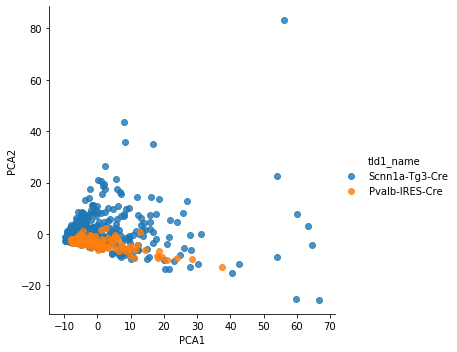

In [31]:
sns.lmplot("PCA1", "PCA2", hue='tld1_name', data=useful_specimens, fit_reg=False)
plt.show()

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

kmeans.fit(first_X_2D)
y_kmeans = kmeans.predict(first_X_2D) 
#y_kmeans.shape

Figure 2 shows the k means centers for the data.  This is more evidence that we do in fact have 2 distinct populations.  The excitatory population seems to be much more spread out that then inhibitory one.  

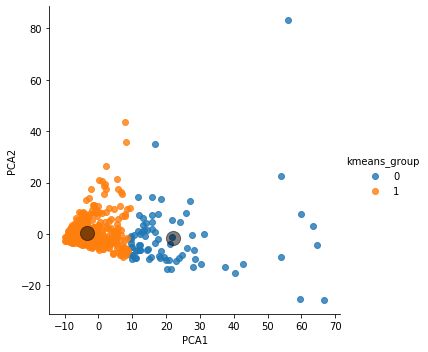

In [33]:
# Add our kmeans group to the data for plotting
useful_specimens['kmeans_group'] = y_kmeans

sns.lmplot("PCA1", "PCA2", hue='kmeans_group', data=useful_specimens, fit_reg=False)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

## Statistical Analysis of Cells Type Data

In [34]:
#Loops through all of the columns in neurons and finds which ones are significantly different

ephys_columns = list(neurons.columns)
ephys_columns = ephys_columns[3:]

#Create excitatory and inhibitory dfs
neurons_excit_df = (neurons[neurons['transgenic_line'] == 'Pvalb-IRES-Cre'])
neurons_inhib_df = (neurons[neurons['transgenic_line'] == 'Scnn1a-Tg3-Cre'])

significant_feat = {}

for idx, data in enumerate(ephys_columns):
    
    excit_data = neurons_excit_df[data]
    inhib_data = neurons_inhib_df[data]
    
    stat, pvalue = stats.skewtest(excit_data)
    stat1, pvalue1 = stats.skewtest(inhib_data)
    statistic = 0
    pvalue_t = 0
    
    #finds pvalue based on whether data is normal or skewed
    if pvalue >= 0.05 and pvalue1 >= 0.05:
        statistic, pvalue_t = stats.ttest_ind(excit_data, inhib_data)
    else:
        statistic, pvalue_t = stats.mannwhitneyu(excit_data, inhib_data)
    
    if pvalue_t < 0.05:
        significant_feat[data] = float('%.5f'%(pvalue_t))

#Prints out the significantly different features with pvalues included
for key,value in significant_feat.items():
    print('The ephys feature, ' + key + ' is significantly different between the two populations with p-value: ' + str(value))

The ephys feature, f_i_curve_slope is significantly different between the two populations with p-value: 0.0
The ephys feature, fast_trough_t_long_square is significantly different between the two populations with p-value: 0.0
The ephys feature, fast_trough_t_short_square is significantly different between the two populations with p-value: 0.0
The ephys feature, fast_trough_v_long_square is significantly different between the two populations with p-value: 0.0
The ephys feature, fast_trough_v_short_square is significantly different between the two populations with p-value: 0.0
The ephys feature, id is significantly different between the two populations with p-value: 0.00132
The ephys feature, input_resistance_mohm is significantly different between the two populations with p-value: 0.01327
The ephys feature, latency is significantly different between the two populations with p-value: 0.0
The ephys feature, peak_t_long_square is significantly different between the two populations with p-v

Of these features, an important one that can tell us about excitability of the two neurons is the vrest. Let us take a closer look on what insight that vrest can give us. Starting with a histogram, we can get an idea of what the distribution looks like.

In [1]:
#Plot histogram value of both inhibitory and excitatory data
fig,ax = plt.subplots(1,2,figsize=(20,5),sharey=True)

excit_vrest = (neurons[neurons['transgenic_line'] == 'Scnn1a-Tg3-Cre'])['vrest']
inhib_vroest = (neurons[neurons['transgenic_line'] == 'Pvalb-IRES-Cre'])['vrest']


#Label plot
ax[0].hist(excit_vrest)
ax[0].set_xlabel("Resting Membrane Potential in mV")
ax[0].set_title("Scnn1a-Tg3-Cre")
ax[1].hist(inhib_vrest)
ax[1].set_xlabel("Resting Membrane Potential in mV")
ax[1].set_title('Pvalb-IRES-Cre')
plt.show()

NameError: name 'plt' is not defined

In [36]:
stats.describe(excit_vrest)

DescribeResult(nobs=46, minmax=(-82.4833526611328, -59.644447326660206), mean=-73.88657122072966, variance=31.456059702591897, skewness=0.7789170924765819, kurtosis=-0.18235889310473485)

In [37]:
stats.describe(inhib_vrest)

DescribeResult(nobs=61, minmax=(-83.2276611328125, -60.3886947631836), mean=-72.51264872316455, variance=24.542419669654432, skewness=0.3091068514835988, kurtosis=-0.12790361969993924)

In [38]:
#Show that one of the distributions is skewed statistically
stat, pvalue = stats.skewtest(excit_vrest)
stat1, pvalue1 = stats.skewtest(inhib_vrest)

print("The pvalue for the skewness of the excitatory cells is: " + str(pvalue))
print("The pvalue for the skewness of the inhibitory cells is: " + str(pvalue1))

The pvalue for the skewness of the excitatory cells is: 0.02572836339111982
The pvalue for the skewness of the inhibitory cells is: 0.28718939537978716


The resting membrane potentials for the inhibitory cells is skewed. Thus, it would be better to visualize this data as a boxplot rather than histograms.  Here the box plots show that the resting membrane potentials was significantly different.  According to documentation the spike width, action potential height, and hyperpolar between these two types of cells are different.  Our data confirmed that to be true consistently.  Figure 4 shows an example of each.

Text(0.5, 1.0, 'Hyperpolarization')

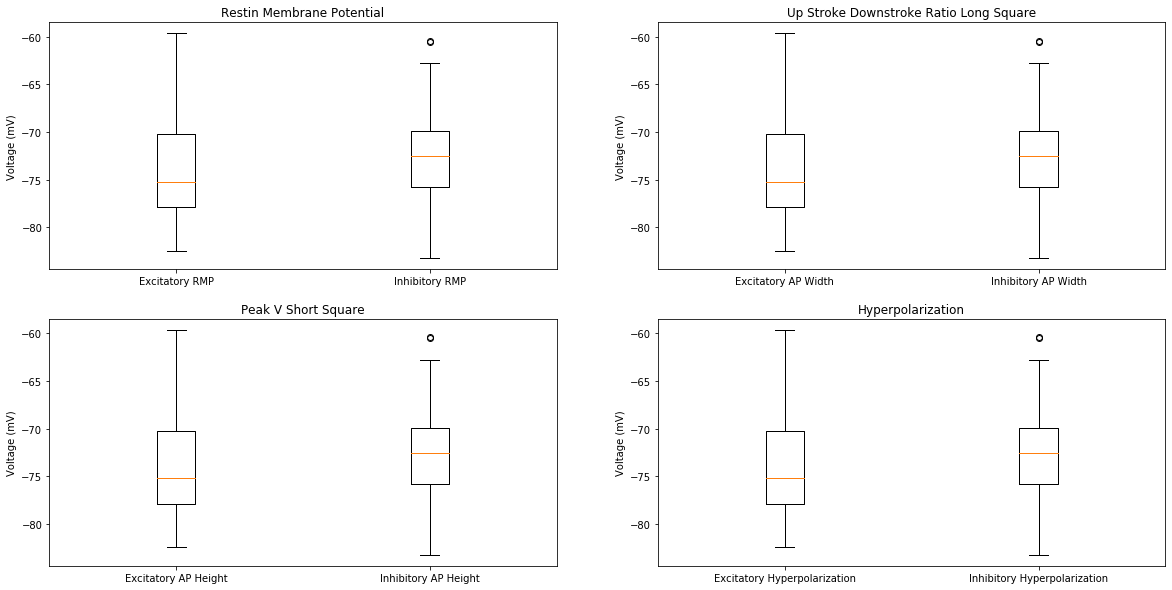

In [39]:
#Makes subplots
fig, ax = plt.subplots(2,2,figsize=(20,10))

#Variables for the significant data to graph
excit_strok = (neurons[neurons['transgenic_line'] == 'Scnn1a-Tg3-Cre'])['upstroke_downstroke_ratio_long_square']
inhib_strok = (neurons[neurons['transgenic_line'] == 'Pvalb-IRES-Cre'])['upstroke_downstroke_ratio_long_square']

excit_peak = (neurons[neurons['transgenic_line'] == 'Scnn1a-Tg3-Cre'])['peak_v_short_square']
inhib_peak = (neurons[neurons['transgenic_line'] == 'Pvalb-IRES-Cre'])['peak_v_short_square']

excit_hyp = (neurons[neurons['transgenic_line'] == 'Scnn1a-Tg3-Cre'])['fast_trough_t_short_square']
inhib_hyp = (neurons[neurons['transgenic_line'] == 'Pvalb-IRES-Cre'])['fast_trough_t_short_square']


boxplot_data = [excit_vrest, inhib_vrest]
ax[0,0].boxplot(boxplot_data)
ax[0,0].set_xticklabels(['Excitatory RMP','Inhibitory RMP'])
ax[0,0].set_ylabel('Voltage (mV)')
ax[0,0].set_title('Restin Membrane Potential')

boxplot_data2 = [excit_strok, inhib_strok]
ax[0,1].boxplot(boxplot_data)
ax[0,1].set_xticklabels(['Excitatory AP Width','Inhibitory AP Width'])
ax[0,1].set_ylabel('Voltage (mV)')
ax[0,1].set_title('Up Stroke Downstroke Ratio Long Square')

boxplot_data3 = [excit_peak, inhib_peak]
ax[1,0].boxplot(boxplot_data)
ax[1,0].set_xticklabels(['Excitatory AP Height','Inhibitory AP Height'])
ax[1,0].set_ylabel('Voltage (mV)')
ax[1,0].set_title('Peak V Short Square')

boxplot_data3 = [excit_hyp, inhib_peak]
ax[1,1].boxplot(boxplot_data)
ax[1,1].set_xticklabels(['Excitatory Hyperpolarization','Inhibitory Hyperpolarization'])
ax[1,1].set_ylabel('Voltage (mV)')
ax[1,1].set_title('Hyperpolarization')


In [40]:
plt.show()
print('The median vrest for excitatory cells is: ' + str(np.median(excit_vrest)) + " mV")
print('The median vrest for inhibitory cells is: ' + str(np.median(inhib_vrest)) + " mV")

The median vrest for excitatory cells is: -75.2070693969727 mV
The median vrest for inhibitory cells is: -72.5131301879883 mV


In [41]:
print(stats.mannwhitneyu(excit_vrest, inhib_vrest))

MannwhitneyuResult(statistic=1140.0, pvalue=0.0492850436652918)


##### PCA and KMeans on a dataset with both inhibitory and excitatory neurons

PCA was performed on the Cell Types data alone.  

In [42]:
from sklearn.decomposition import PCA  
pca = PCA()                            
X_2D = pca.fit_transform(x_data_cells)

In [43]:
#Run PCA on 2D all-neuron data and append data to end of df
neurons['PCA1'] = X_2D[:, 0]
neurons['PCA2'] = X_2D[:, 1]
neurons['PCA3'] = X_2D[:, 2]
neurons.head()

,transgenic_line,specimen_id,structure_layer_name,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_short_square,id,input_resistance_mohm,latency,peak_t_long_square,peak_t_short_square,peak_v_long_square,peak_v_short_square,rheobase_sweep_id,rheobase_sweep_number,ri,sag,seal_gohm,tau,threshold_i_long_square,threshold_i_short_square,threshold_t_long_square,threshold_t_short_square,threshold_v_long_square,threshold_v_short_square,thumbnail_sweep_id,trough_t_long_square,trough_t_short_square,trough_v_long_square,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,PCA1,PCA2,PCA3
8,Scnn1a-Tg3-Cre,476135066,4,-68.804996,0.139337,1.151005,1.025066,-44.468754,-46.587502,476172339,105.986640,0.059385,1.148220,1.023310,35.781254,43.700003,476144277,37,95.178552,0.031621,1.063488,25.216166,130.0,424.0,1.147855,1.023007,-36.656254,-48.556252,476144281,1.185285,1.416055,-54.281254,-75.062500,3.386317,3.857029,-87.000008,-75.066132,-1.125427e+07,-155.481341,-33.125067
22,Scnn1a-Tg3-Cre,470098860,4,-3.065625,0.227151,1.139550,1.025102,-54.093754,-53.937503,470160928,142.898272,0.037945,1.137480,1.023376,35.187500,37.112502,470154772,46,179.687470,0.032512,2.195178,26.756292,100.0,900.0,1.137090,1.023034,-42.281250,-50.250002,470154756,1.156085,1.495018,-60.656254,-80.862502,3.278334,3.712753,-99.187508,-80.129494,-1.724380e+07,308.837401,-125.309669
25,Scnn1a-Tg3-Cre,479091820,4,-10.133750,-0.003381,1.189130,1.026841,-46.000000,-52.023440,479094041,153.632064,0.061840,1.182530,1.023524,24.000000,32.406251,479092968,38,154.107109,0.075938,2.517844,19.143602,110.0,460.0,1.181850,1.023052,-31.937502,-49.117189,479092974,1.236585,1.352083,-56.156250,-78.898438,3.139299,3.893947,-94.625000,-78.553154,-8.305579e+06,-126.092942,-81.031616
65,Scnn1a-Tg3-Cre,515202564,4,-12.660000,0.141274,1.239480,1.025428,-48.531254,-51.875002,515202865,169.609664,0.059960,1.236380,1.023460,32.000000,36.862502,515202698,49,123.906247,0.069373,1.842839,20.855973,100.0,1080.0,1.235940,1.023104,-38.218750,-45.306252,515202680,1.274960,1.605676,-59.250004,-78.375005,3.824073,3.830650,-92.062500,-77.858864,2.780413e+07,499.077803,-143.045235
211,Scnn1a-Tg3-Cre,476269122,4,-14.635000,0.114082,1.181900,1.025358,-47.000004,-51.012502,476270343,131.712256,0.079980,1.179195,1.023402,39.531254,46.750002,476269995,77,124.687426,0.017851,2.270196,17.407119,150.0,1160.0,1.178765,1.023045,-34.031254,-46.587502,476269941,1.212600,1.424983,-54.718750,-76.156255,3.214515,3.783612,-88.687500,-76.060822,-1.112861e+07,575.256168,-82.556584


Figure 5 plot visualizes PCA of both neuron types and showed what looks like 3 groups of data with visible overalp between the two cell types.

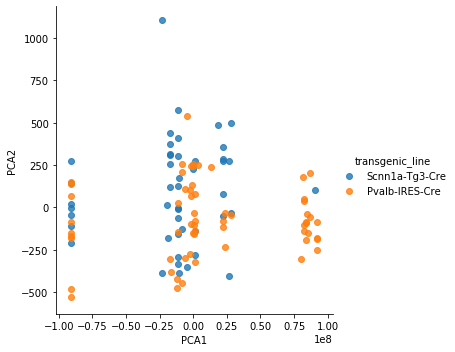

In [44]:
#Plot PCA
sns.lmplot("PCA1", "PCA2", hue='transgenic_line', data=neurons, fit_reg=False)
plt.show()

KMeans were calculated to identify centers of data.  

In [45]:
#Given the PCA plot, it can be seen that a 3 kmeans cluster would give the best insight
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

kmeans.fit(X_2D)
y_kmeans = kmeans.predict(X_2D) 
#y_kmeans.shape

We calculated 3 centers from K means clusters. 
Figure 6 is a plot of the K means clusters. It shows 3 groups of data which could mean there are 3 populations within our data.  We will explore this in the Discussion.  

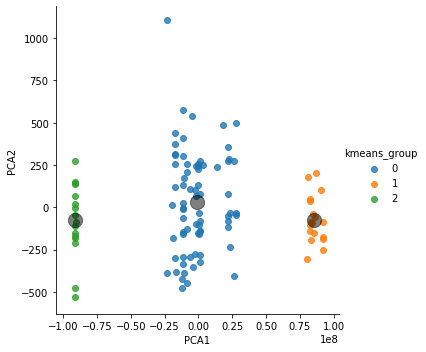

In [46]:
# Add our kmeans group to the data for plotting
neurons['kmeans_group'] = y_kmeans

#Plotted the data
sns.lmplot("PCA1", "PCA2", hue='kmeans_group', data=neurons, fit_reg=False)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

# Discussion

To begin to analyze biological differences or identifiers of cell populations in layer 4 of the primary visual cortex, we first wanted to see the variability or correlation between excitatory and inhibitory neurons. We utilized Principle Component Analysis (PCA) to look for patterns in the Brain Observatory data. In Figure 1 we can see the distinct inhibitory and excitatory neuron groups, but it is difficult to tell if they are separately clustered. The inhibitory neuron features are overlapping excitatory neuron features. Our K means clustering further validated that there are 2 distinct populations.  The excitatory population has a wider spread than the inhibitory population. We can also infer the extensive overlap of the inhibitory neurons onto the excitatory neurons is due to the fact that even though they are different the function of both of these neuron types in layer 4 of V1 necessitates having similar electrophysioloigical activity when responding to visual stimuli. (Priebe, N. J., & Ferster, D.,  2012)
	To analyze excitatory and inhibitory cells using the Cell Type data we began investigating their resting membrane potentials as a possible biological identifier.  Using a histogram for Figure 3 to clearly visualize the resting membrane potentials of the two different cell types we could see that the inhibitory cell type, 'Pvalb-IRES-Cre', had a higher Vrest (mV) than the excitatory cell type, 'Scnn1a-Tg3-Cre'. This warranted more investigation, and after performing a skew test to determine the p-value of skewness of each cell type we found out that the resting membrane potential of inhibitory cells is skewed. Due to this finding, a box plot was created to better visualize this data. And included in Figure 4 along with Vrest was AP width, AP amplitude, and hyperpolarization to analyze more features related to Vrest between inhibitory and excitatory neurons. These boxplots showed that the excitatory cell types of layer 4 visual cortex exhibited larger AP width, higher AP amplitude, and a more shallow dip after hyperpolarization.  This features were significantly different than inhibitory neurons in keeping with the literature. (Priebe, N. J., & Ferster, D.,  2012)  Also, using the boxplot, median Vrest of excitatory and inhibitory cells, and Man Whitney function, we confirmed that the 'Pvalb-IRES-Cre', had a higher Vrest than the excitatory cell type, 'Scnn1a-Tg3-Cre', with significance of a p-value = 0.049. 
	We then performed PCA and KMeans on both inhibitory and excitatory neurons from the Cell Types data. The plot is Figure 5 shows 3 distinct groups of data and there is overlap between the inhibitory and excitatory cell types in each. After seeing these distinct groups a KMeans was calculated and visualized to clarify centers of data. Figure 6 KMeans scatter plot clearly shows 3 different groups of data which we inferred to be at least 3 different types of excitatory neurons in layer 4 of the visual cortex. According to a study by Taejun Kim and Ralph Freeman at the University of California, Berkeley, there is a broad range of DSI( Directional Selectivity index) values for the neurons in layer four of the visual cortex (Kim and Freeman, 2020). A broad DSI could point to the fact that there is more than one type of excitatory neuron in layer 4 of the visual cortex and at the least, corroborates this idea and influences further research on the specific topic. 

### **Conclusion:**

### **Reflection:**

**Reflection?Discussion?**
It is important to note some things that could have given us more advanced, clearer inferences from the data. For instance, due to the extensive overlap of the inhibitory and excitatory neuronal cell type populations an ICA could have been more useful than a PCA but with our current coding level we are really only familiar with using PCA to interpret the data. 
	Also it is important to take into account other spiny excitatory cell types in Layer 4 of the Visual Cortex. For instance, Martinotti cells could be within our data and influencing it. We would have to match the specimen id to the morphology dataset to confirm if cells like Martinotti are a part of our data.

# Supplemental Information

Eigen values were computed and a screeplot was created for the Cell Types excitatory and inhibitory data just to confirm finding.

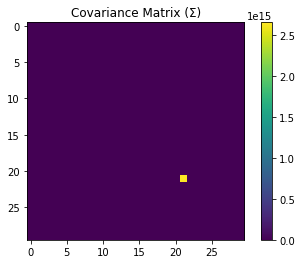

In [47]:
#Covairance
covarDATA = x_data_cells.cov()

plt.imshow(covarDATA)
plt.colorbar()
plt.title('Covariance Matrix (\u03A3)')
plt.show()

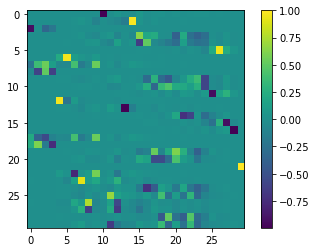

In [48]:
# Use the linalg.eigh to compute the eigenvectors and eigenvalues
eigenvectors, eigenvalues = np.linalg.eigh(covarDATA)

plt.imshow(eigenvalues)
plt.colorbar()
plt.show()

In [49]:
#Checks the sum of our eigenvectors
eigenSum = np.sum(eigenvectors)
print(eigenSum)

2650553622290918.5


In [50]:
#Import the necessary PCA package
from sklearn.decomposition import PCA

#Create a PCA model
pca = PCA() 
x_data_pca = pca.fit_transform(x_data)

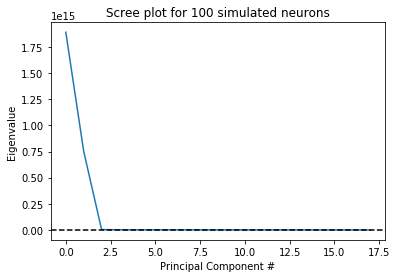

In [51]:
#Plot the expected variance
plt.plot(pca.explained_variance_ratio_*2650553622290918) 

#Plots a horizontal line at 1, the Kaiser criterion
plt.axhline(1,c='k',ls='--') 

plt.title('Scree plot for 100 simulated neurons')
plt.ylabel('Eigenvalue') 
plt.xlabel('Principal Component #')
plt.show()

##### PCA and KMeans on only excitatory neurons

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


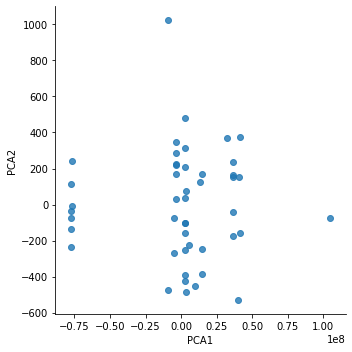

In [52]:
#Similar to PCA for all neurons, except this is only for excitatory neurons
E_X_2D = pca.fit_transform(x_data_excit)
neurons_excit = neurons[neurons['transgenic_line'] == 'Scnn1a-Tg3-Cre']

neurons_excit['PCA1'] = E_X_2D[:,0]
neurons_excit['PCA2'] = E_X_2D[:,1]

sns.lmplot("PCA1", "PCA2", data=neurons_excit, fit_reg=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


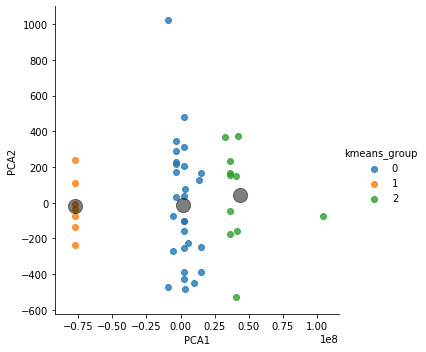

In [53]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(E_X_2D)
y_kmeans = kmeans.predict(E_X_2D)
neurons_excit['kmeans_group'] = y_kmeans

sns.lmplot("PCA1", "PCA2", hue='kmeans_group', data=neurons_excit, fit_reg=False)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

##### PCA and KMeans on only inhibitory neurons

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


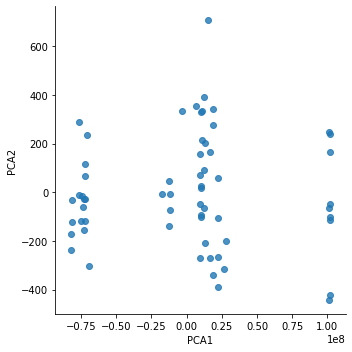

In [54]:
#Similar to PCA for all neurons, except this is only for inhibitory neurons
I_X_2D = pca.fit_transform(x_data_inhib)
neurons_inhib = neurons[neurons['transgenic_line'] == 'Pvalb-IRES-Cre']

neurons_inhib['PCA1'] = I_X_2D[:,0]
neurons_inhib['PCA2'] = I_X_2D[:,1]

sns.lmplot("PCA1", "PCA2", data=neurons_inhib, fit_reg=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


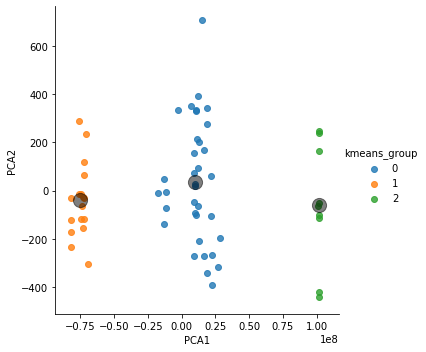

In [55]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(I_X_2D)
y_kmeans = kmeans.predict(I_X_2D)
neurons_inhib['kmeans_group'] = y_kmeans

sns.lmplot("PCA1", "PCA2", hue='kmeans_group', data=neurons_inhib, fit_reg=False)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()